In [8]:
import pandas as pd
import glob
import talib
import matplotlib.pyplot as plt


file_path = r"C:/Users/pc/Desktop/10 Academy/Week 1/yfinance_data/*.csv"

# Get list of CSV files
csv_files = glob.glob(file_path)

# Load and concatenate all CSVs into one DataFrame
df_list = []
for file in csv_files:
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

# Combine all data
df = pd.concat(df_list, ignore_index=True)

# Optional: sort by date if you have a date column
df['Date'] = pd.to_datetime(df['Date'])  # adjust column name if needed
df = df.sort_values('Date').reset_index(drop=True)

print(df.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [11]:

# Example assumes 'Close' column exists
close = df['Close']
# Make sure the 'Close' column is present and numeric
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# 1. Simple Moving Average (SMA)
df['SMA_20'] = talib.SMA(close, timeperiod=20)

# 2. Exponential Moving Average (EMA)
df['EMA_20'] = talib.EMA(close, timeperiod=20)

# 3. Relative Strength Index (RSI)
df['RSI_14'] = talib.RSI(close, timeperiod=14)

# 4. MACD (Moving Average Convergence Divergence)
macd, macd_signal, macd_hist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macd_signal
df['MACD_Hist'] = macd_hist


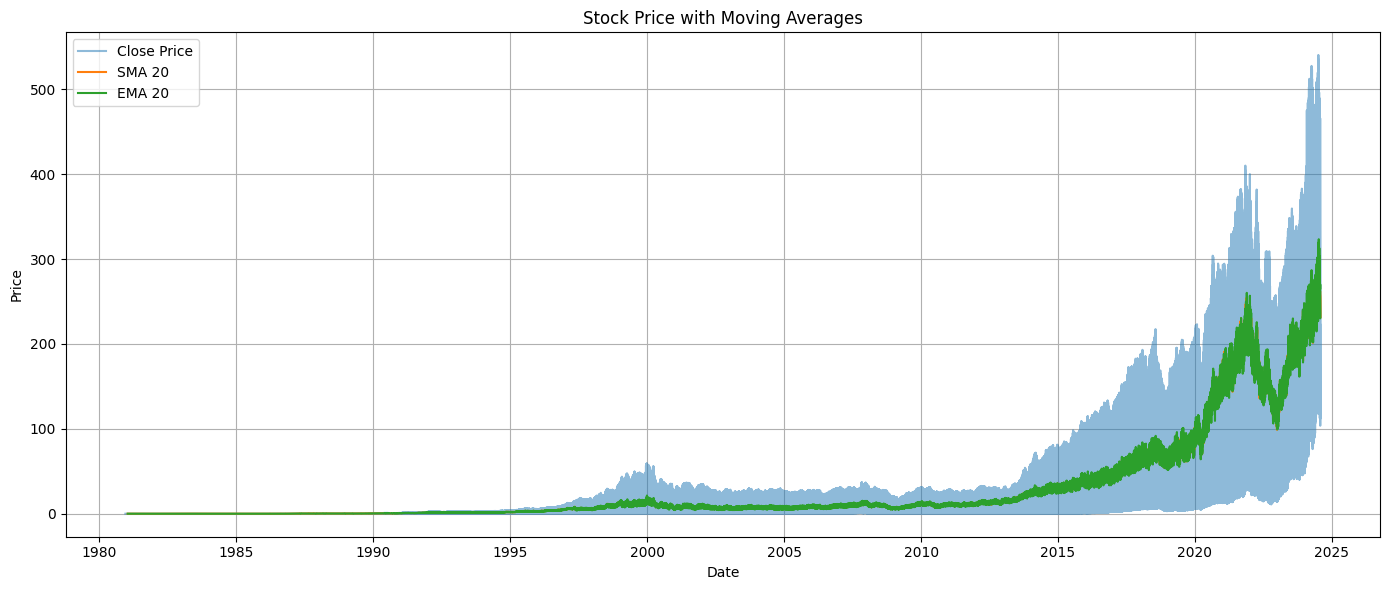

In [12]:

# Plot Close + SMA + EMA
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['SMA_20'], label='SMA 20')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
